In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dominos_data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

In [3]:
# Get an overview of the dataset
print("Dataset Overview:")
print(dominos_data.info())
print("\n")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Order ID                   150000 non-null  int64  
 1   Order Time                 150000 non-null  object 
 2   Day of Week                150000 non-null  object 
 3   Delivery Distance (miles)  150000 non-null  float64
 4   Weather                    150000 non-null  object 
 5   Traffic                    150000 non-null  object 
 6   Order Size                 55875 non-null   float64
 7   Store Location             150000 non-null  object 
 8   Driver Experience          150000 non-null  object 
 9   Special Offers             150000 non-null  object 
 10  Order Type                 150000 non-null  object 
 11  Customer Type              150000 non-null  object 
 12  Peak Hours                 150000 non-null  object 
 13  Pizza Order

In [4]:
# Calculate the percentage of missing values
total_rows = len(dominos_data)
missing_percentage = dominos_data.isna().mean() * 100
print("Percentage of Missing Values:")
print(missing_percentage.sort_values(ascending=False))
print("\n")

Percentage of Missing Values:
Order Size                   62.75
Order ID                      0.00
Customer Type                 0.00
Order Size Impact             0.00
Delivery Difficulty           0.00
Traffic_Factor                0.00
Weather_Factor                0.00
Total Dollars                 0.00
Pizza Ordered                 0.00
Peak Hours                    0.00
Order Type                    0.00
Order Time                    0.00
Special Offers                0.00
Driver Experience             0.00
Store Location                0.00
Traffic                       0.00
Weather                       0.00
Delivery Distance (miles)     0.00
Day of Week                   0.00
Delivered On Time             0.00
dtype: float64




In [5]:
#filling order size using order size impact and total dollars
dominos_data['Order Size'] = dominos_data['Order Size Impact'] / dominos_data['Total Dollars']

In [6]:
# Calculate the percentage of missing values
total_rows = len(dominos_data)
missing_percentage = dominos_data.isna().mean() * 100
print("Percentage of Missing Values:")
print(missing_percentage.sort_values(ascending=False))
print("\n")

Percentage of Missing Values:
Order ID                     0.0
Order Time                   0.0
Order Size Impact            0.0
Delivery Difficulty          0.0
Traffic_Factor               0.0
Weather_Factor               0.0
Total Dollars                0.0
Pizza Ordered                0.0
Peak Hours                   0.0
Customer Type                0.0
Order Type                   0.0
Special Offers               0.0
Driver Experience            0.0
Store Location               0.0
Order Size                   0.0
Traffic                      0.0
Weather                      0.0
Delivery Distance (miles)    0.0
Day of Week                  0.0
Delivered On Time            0.0
dtype: float64




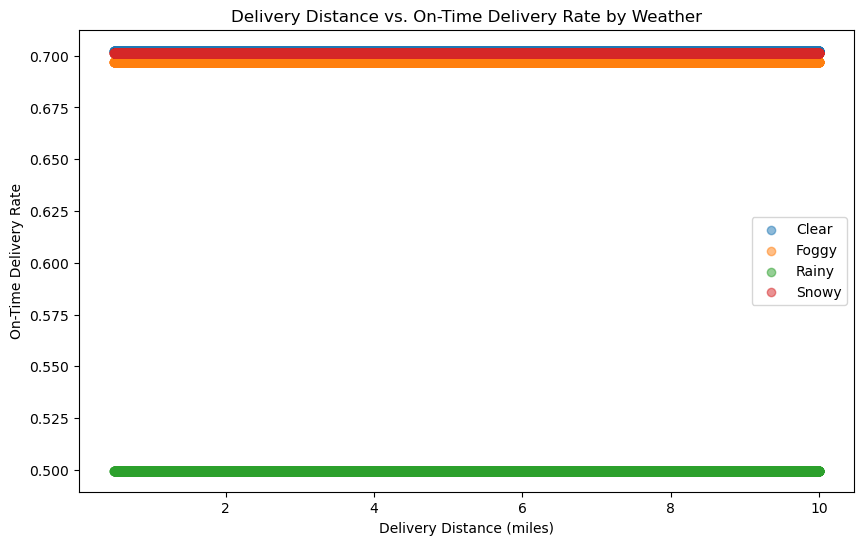

In [7]:
# Create a scatter plot of delivery distance vs. on-time delivery rate
plt.figure(figsize=(10, 6))
for weather, group in dominos_data.groupby('Weather'):
    on_time_rate = group.loc[group['Delivered On Time'] == 'Yes', 'Delivery Distance (miles)'].count() / len(group)
    plt.scatter(group['Delivery Distance (miles)'], [on_time_rate] * len(group), label=weather, alpha=0.5)

plt.xlabel('Delivery Distance (miles)')
plt.ylabel('On-Time Delivery Rate')
plt.title('Delivery Distance vs. On-Time Delivery Rate by Weather')
plt.legend()
plt.show()

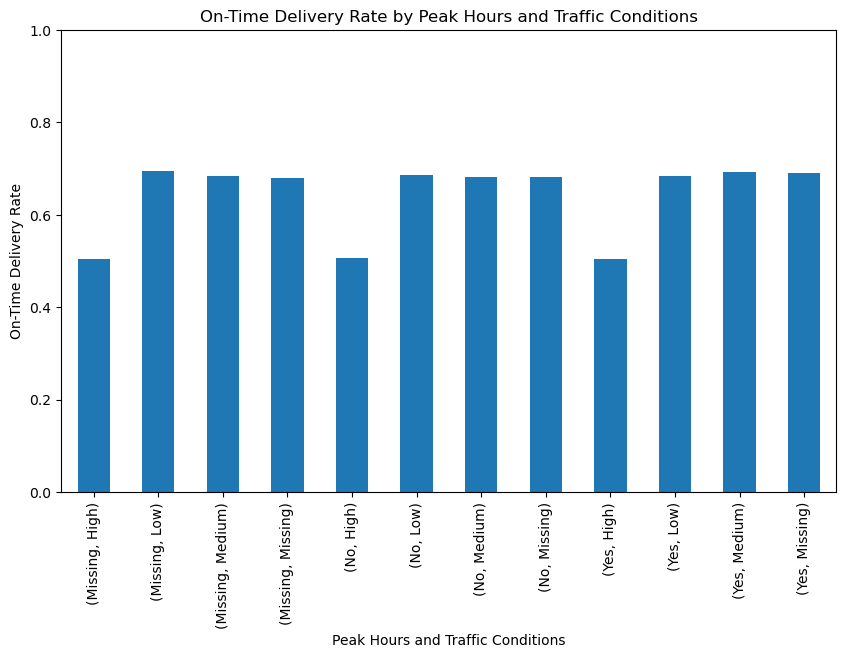

In [8]:
# Group the data by peak hours and traffic conditions
grouped = dominos_data.groupby(['Peak Hours', 'Traffic'])['Delivered On Time'].value_counts().unstack().fillna(0)

# Calculate the on-time delivery rate for each group
on_time_rates = grouped['Yes'] / (grouped['Yes'] + grouped['No'])

# Create a bar plot
on_time_rates.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Peak Hours and Traffic Conditions')
plt.ylabel('On-Time Delivery Rate')
plt.title('On-Time Delivery Rate by Peak Hours and Traffic Conditions')
plt.ylim(0, 1)  # Set y-axis limits for better visibility
plt.show()

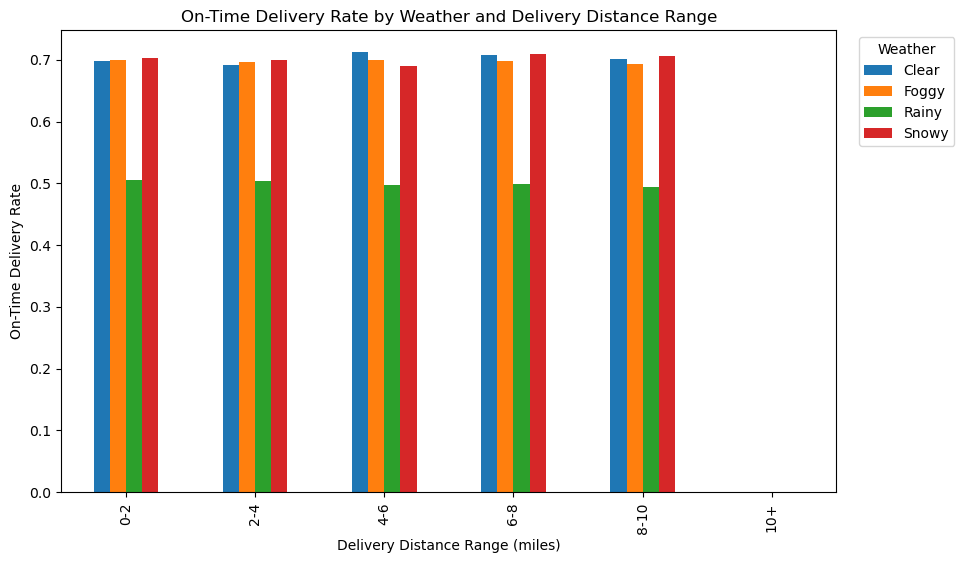

In [9]:
# Create a bin for delivery distance ranges
bins = [0, 2, 4, 6, 8, 10, float('inf')]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
dominos_data['Delivery Distance Range'] = pd.cut(dominos_data['Delivery Distance (miles)'], bins=bins, labels=labels, include_lowest=True)

# Calculate on-time delivery rate for each weather condition and delivery distance range
on_time_rates = dominos_data.groupby(['Weather', 'Delivery Distance Range'])['Delivered On Time'].value_counts().unstack(fill_value=0)
on_time_rates = on_time_rates['Yes'] / (on_time_rates['Yes'] + on_time_rates['No'])

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
on_time_rates.unstack('Weather').plot(kind='bar', ax=ax)

# Customize the plot
ax.set_xlabel('Delivery Distance Range (miles)')
ax.set_ylabel('On-Time Delivery Rate')
ax.set_title('On-Time Delivery Rate by Weather and Delivery Distance Range')
ax.legend(title='Weather', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

TypeError: 'value' must be an instance of str or bytes, not a tuple

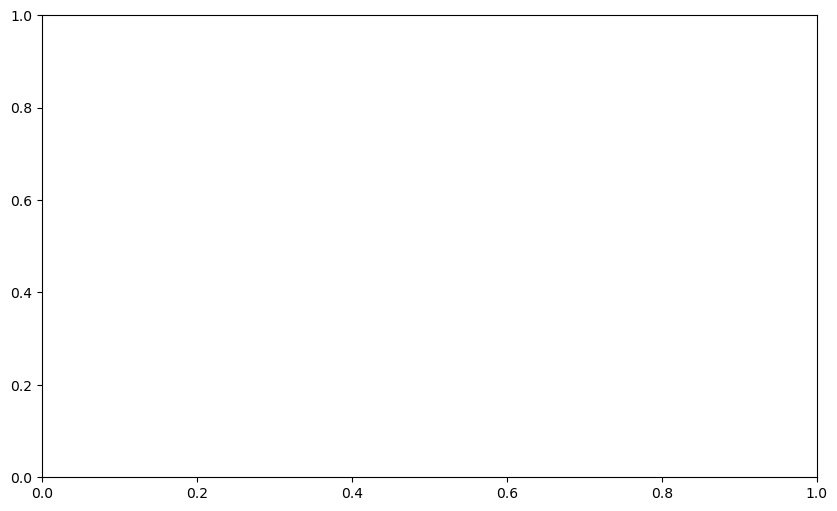

In [10]:
# Group the data by peak hours and traffic conditions
grouped = dominos_data.groupby(['Peak Hours', 'Traffic'])['Delivered On Time'].value_counts().unstack().fillna(0)

# Calculate the on-time delivery rate for each group
on_time_rates = grouped['Yes'] / (grouped['Yes'] + grouped['No'])

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(on_time_rates.index, on_time_rates.values, marker='o')
plt.xlabel('Peak Hours and Traffic Conditions')
plt.ylabel('On-Time Delivery Rate')
plt.title('On-Time Delivery Rate by Peak Hours and Traffic Conditions')
plt.ylim(0, 1)  # Set y-axis limits for better visibility

# Customize x-axis labels
plt.xticks(range(len(on_time_rates.index)), [f"{ph}\n{t}" for ph, t in on_time_rates.index], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Group the data by peak hours, weather, and driver experience
grouped = dominos_data[dominos_data['Peak Hours'] == 'Yes'].groupby(['Weather', 'Driver Experience'])['Delivered On Time'].value_counts().unstack(fill_value=0)

# Calculate the on-time delivery rate for each group
on_time_rates = grouped['Yes'] / (grouped['Yes'] + grouped['No'])

# Create a line chart
plt.figure(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # colors for different weather conditions
markers = ['o', 's', '^']  # markers for different weather conditions

for idx, weather in enumerate(on_time_rates.index.unique(level='Weather')):
    weather_data = on_time_rates.loc[weather]
    plt.plot(weather_data.index, weather_data.values, 
             label=weather, color=colors[idx], marker=markers[idx], markersize=10)

plt.xlabel('Driver Experience', fontsize=12)
plt.ylabel('On-Time Delivery Rate During Peak Hours', fontsize=12)
plt.title('Impact of Driver Experience on On-Time Delivery\nDuring Peak Hours in Various Weather Conditions', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits for better visibility

# Customize x-axis labels
plt.xticks(range(len(on_time_rates.index.unique(level='Driver Experience'))), 
           on_time_rates.index.unique(level='Driver Experience'), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Convert categorical variables to numerical
dominos_data['Delivered On Time Numeric'] = np.where(dominos_data['Delivered On Time'] == 'Yes', 1, 0)
dominos_data['Weather Numeric'] = dominos_data['Weather_Factor']
dominos_data['Traffic Numeric'] = dominos_data['Traffic_Factor']
dominos_data['Peak Hours Numeric'] = np.where(dominos_data['Peak Hours'] == 'Yes', 1, 0)

# Select relevant numerical columns for correlation
corr_columns = ['Delivery Distance (miles)', 'Weather Numeric', 'Traffic Numeric', 
               'Order Size', 'Total Dollars', 'Delivery Difficulty', 'Order Size Impact',
               'Peak Hours Numeric', 'Delivered On Time Numeric', 'Delivery Time']

# Compute the correlation matrix
corr_matrix = dominos_data[corr_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt=".2f")

plt.title("Correlation Matrix of Factors Influencing Delivery Performance", fontsize=16)
plt.show()

In [ ]:
# Create a scatter plot of delivery distance vs. on-time delivery rate
plt.figure(figsize=(12, 8))

# Store on-time rates for each weather condition
weather_rates = {}

for weather, group in dominos_data.groupby('Weather'):
    on_time_rate = group.loc[group['Delivered On Time'] == 'Yes', 'Delivery Distance (miles)'].count() / len(group)
    weather_rates[weather] = on_time_rate
    plt.scatter(group['Delivery Distance (miles)'], [on_time_rate] * len(group), label=weather, alpha=0.7, edgecolors='black', linewidth=0.5)

# Calculate y-axis limits
min_rate = min(weather_rates.values()) - 0.05
max_rate = max(weather_rates.values()) + 0.05

plt.xlabel('Delivery Distance (miles)', fontsize=12)
plt.ylabel('On-Time Delivery Rate', fontsize=12)
plt.title('Delivery Distance vs. On-Time Delivery Rate by Weather Conditions', fontsize=14)
plt.xlim(0, dominos_data['Delivery Distance (miles)'].max() * 1.1)
plt.ylim(min_rate, max_rate)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data
dominos_data = pd.read_csv('Domino_s_Delivery_Data-1.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Special Offers', 'Order Type', 'Customer Type', 'Pizza Ordered']
for col in categorical_cols:
    dominos_data[col] = label_encoder.fit_transform(dominos_data[col])

# Split the data into features and target
X = dominos_data.drop('Delivered On Time', axis=1)
y = dominos_data['Delivered On Time'].map({'Yes': 1, 'No': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data
dominos_data = pd.read_csv('Domino_s_Delivery_Data-1.csv')

# Extract hour from Order Time
dominos_data['Order Hour'] = pd.to_datetime(dominos_data['Order Time']).dt.hour

# Define peak hours (e.g., 5 PM to 8 PM)
dominos_data['Peak Hours'] = (dominos_data['Order Hour'] >= 17) & (dominos_data['Order Hour'] <= 20)

# Drop the original Order Time column
dominos_data = dominos_data.drop('Order Time', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Special Offers', 'Order Type', 'Customer Type', 'Pizza Ordered', 'Peak Hours']
for col in categorical_cols:
    dominos_data[col] = label_encoder.fit_transform(dominos_data[col])

# One-hot encode categorical variables if needed
# encoder = OneHotEncoder(handle_unknown='ignore')
# dominos_data = pd.DataFrame(encoder.fit_transform(dominos_data[categorical_cols]).toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Split the data into features and target
X = dominos_data.drop('Delivered On Time', axis=1)
y = dominos_data['Delivered On Time'].map({'Yes': 1, 'No': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get the feature names
feature_names = X_train.columns

# Print the coefficients and corresponding feature names
print("\nCoefficients:")
for coef, feature in zip(model.coef_[0], feature_names):
    print(f"{feature}: {coef:.2f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer

# Load the data
dominos_data = pd.read_csv('Domino_s_Delivery_Data-1.csv')

# Extract hour from Order Time
dominos_data['Order Hour'] = pd.to_datetime(dominos_data['Order Time']).dt.hour

# Define peak hours (e.g., 5 PM to 8 PM)
dominos_data['Peak Hours'] = (dominos_data['Order Hour'] >= 17) & (dominos_data['Order Hour'] <= 20)

# Drop the original Order Time column
dominos_data = dominos_data.drop('Order Time', axis=1)

# Separate categorical and numerical columns
categorical_cols = ['Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Special Offers', 'Order Type', 'Customer Type', 'Pizza Ordered', 'Peak Hours']
numerical_cols = [col for col in dominos_data.columns if col not in categorical_cols and col != 'Delivered On Time']

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit the preprocessor on the data and transform the features
X = preprocessor.fit_transform(dominos_data)

# Split the data into features and target
y = dominos_data['Delivered On Time'].map({'Yes': 1, 'No': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get the feature names
feature_names = list(preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)) + numerical_cols

# Print the coefficients and corresponding feature names
print("\nCoefficients:")
for coef, feature in zip(model.coef_[0], feature_names):
    print(f"{feature}: {coef:.2f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data
dominos_data = pd.read_csv('Domino_s_Delivery_Data-1.csv')

# Extract hour from Order Time
dominos_data['Order Hour'] = pd.to_datetime(dominos_data['Order Time']).dt.hour

# Define peak hours (e.g., 5 PM to 8 PM)
dominos_data['Peak Hours'] = (dominos_data['Order Hour'] >= 17) & (dominos_data['Order Hour'] <= 20)

# Drop the original Order Time column
dominos_data = dominos_data.drop('Order Time', axis=1)

# Separate categorical and numerical columns
categorical_cols = ['Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Special Offers', 'Order Type', 'Customer Type', 'Pizza Ordered', 'Peak Hours', 'Day of Week']
numerical_cols = [col for col in dominos_data.columns if col not in categorical_cols and col != 'Delivered On Time']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into features and target
X = dominos_data.drop('Delivered On Time', axis=1)
y = dominos_data['Delivered On Time'].map({'Yes': 1, 'No': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the data
dominos_data = pd.read_csv('Domino_s_Delivery_Data-1.csv')

# Extract hour from Order Time
dominos_data['Order Hour'] = pd.to_datetime(dominos_data['Order Time']).dt.hour

# Define peak hours (e.g., 5 PM to 8 PM)
dominos_data['Peak Hours'] = (dominos_data['Order Hour'] >= 17) & (dominos_data['Order Hour'] <= 20)

# Drop the original Order Time column
dominos_data = dominos_data.drop('Order Time', axis=1)

# Select the relevant features
features = ['Order Size', 'Traffic', 'Delivery Difficulty', 'Weather', 'Order Hour', 'Peak Hours']
X = dominos_data[features]

# Encode categorical variables
categorical_cols = ['Traffic', 'Weather']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X = preprocessor.fit_transform(X)

# Split the data into features and target
y = dominos_data['Delivered On Time'].map({'Yes': 1, 'No': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get the feature names
feature_names = list(preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)) + numerical_cols

# Print the coefficients and corresponding feature names
print("\nCoefficients:")
for coef, feature in zip(model.coef_[0], feature_names):
    print(f"{feature}: {coef:.2f}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)

# Select features and target
features = ['Order Size', 'Order Size Impact', 'Traffic_Factor', 'Delivery Difficulty', 'Weather_Factor']
X = data[features].fillna(0)  # Fill NaN values with 0, adjust if needed
y = data['Delivered On Time Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print coefficients and their interpretations
feature_importances = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
feature_importances = feature_importances.reindex(feature_importances['Coefficient'].abs().sort_values(ascending=False).index)

print("\nFeature Importances:")
print(feature_importances)
print("\nInterpretation of Coefficients:")
for index, row in feature_importances.iterrows():
    print(f"{row['Feature']}:")
    if row['Coefficient'] > 0:
        print(f"  - A one-unit increase in {row['Feature']} (when standardized) increases the log-odds of on-time delivery by {row['Coefficient']:.2f}.")
    else:
        print(f"  - A one-unit increase in {row['Feature']} (when standardized) decreases the log-odds of on-time delivery by {abs(row['Coefficient']):.2f}.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)

# Select features and target
features = ['Delivery Distance (miles)', 'Weather_Factor', 'Traffic_Factor', 'Order Size Impact', 'Delivery Difficulty']
X = data[features].fillna(0)  # Fill NaN values with 0, adjust if needed
y = data['Delivered On Time Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)

# Select features and target
features = [ 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)

# Convert 'Order Time' to minutes since midnight
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = [ 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Print feature coefficients
feature_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)
print("\nFeature Coefficients:")
print(feature_coefficients)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("Book1-dominos.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = ['Order Time', 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred_proba = lr_model.predict(X_test_scaled)
lr_pred = np.where(lr_pred_proba > 0.5, 1, 0)  # Convert probabilities to classes

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Print results
print("Random Forest Model:")
print("Confusion Matrix:\n", rf_cm)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-score: {f1_score(y_test, rf_pred):.4f}")

print("\nLinear Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")

# Visualize the Random Forest decision tree (just one of the trees)
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=features, class_names=['Not On Time', 'On Time'], filled=True, rounded=True)
plt.title("Visualization of a Single Tree in the Random Forest")
plt.savefig("random_forest_tree.png")
plt.close()

print("\nA single tree from the Random Forest has been visualized and saved as 'random_forest_tree.png'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree  # Add this import
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = ['Order Time', 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred_proba = lr_model.predict(X_test_scaled)
lr_pred = np.where(lr_pred_proba > 0.5, 1, 0)  # Convert probabilities to classes

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Print results
print("Random Forest Model:")
print("Confusion Matrix:\n", rf_cm)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-score: {f1_score(y_test, rf_pred):.4f}")

print("\nLinear Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")

# Visualize the Random Forest decision tree (just one of the trees)
plt.figure(figsize=(12, 8))
tree_to_plot = rf_model.estimators_[0]
plot_tree(tree_to_plot, feature_names=features, class_names=['Not On Time', 'On Time'], filled=True, rounded=True)
plt.title("Visualization of a Single Tree in the Random Forest")
plt.tight_layout()  # Add this to ensure the entire tree fits in the figure
plt.savefig("random_forest_tree.png", dpi=300)  # Increase dpi for better quality
plt.close()

print("\nA single tree from the Random Forest has been visualized and saved as 'random_forest_tree.png'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
import statsmodels.tools.eval_measures as measures
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
import statsmodels.tools.eval_measures as measures
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = [ 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred_proba = lr_model.predict(X_test_scaled)
lr_pred = np.where(lr_pred_proba > 0.5, 1, 0)  # Convert probabilities to classes

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_pred_proba)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred_proba)
lr_aic = measures.mse_ic(lr_mse, df_model=X_train_scaled.shape[1])

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

# Print results
print("Random Forest Model:")
print("Confusion Matrix:\n", rf_cm)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-score: {f1_score(y_test, rf_pred):.4f}")
print(f"RMSE: {rf_rmse:.4f}")

print("\nLinear Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")
print(f"R-Squared: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.4f}")
print(f"AIC: {lr_aic:.4f}")

# Visualize the Random Forest decision tree (just one of the trees)
plt.figure(figsize=(12, 8))
tree_to_plot = rf_model.estimators_[0]
plot_tree(tree_to_plot, feature_names=features, class_names=['Not On Time', 'On Time'], filled=True, rounded=True)
plt.title("Visualization of a Single Tree in the Random Forest")
plt.tight_layout()  # Add this to ensure the entire tree fits in the figure
plt.savefig("random_forest_tree.png", dpi=300)  # Increase dpi for better quality
plt.close()
print("\nA single tree from the Random Forest has been visualized and saved as 'random_forest_tree.png'.")

AttributeError: module 'statsmodels.tools.eval_measures' has no attribute 'mse_ic'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree  # Add this import
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']

for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = ['Order Time', 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred_proba = lr_model.predict(X_test_scaled)
lr_pred = np.where(lr_pred_proba > 0.5, 1, 0)  # Convert probabilities to classes

# Confusion Matrices
rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

# Print results
print("Random Forest Model:")
print("Confusion Matrix:\n", rf_cm)
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-score: {f1_score(y_test, rf_pred):.4f}")

print("\nLinear Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")

# Visualize the Random Forest decision tree (just one of the trees)
plt.figure(figsize=(12, 8))
tree_to_plot = rf_model.estimators_[0]
plot_tree(tree_to_plot, feature_names=features, class_names=['Not On Time', 'On Time'], filled=True, rounded=True)
plt.title("Visualization of a Single Tree in the Random Forest")
plt.tight_layout()  # Add this to ensure the entire tree fits in the figure
plt.savefig("random_forest_tree.png", dpi=300)  # Increase dpi for better quality
plt.close()

print("\nA single tree from the Random Forest has been visualized and saved as 'random_forest_tree.png'.")

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("Domino_s_Delivery_Data-1.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = [ 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)

# Evaluation Metrics
print("Logistic Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")

Logistic Regression Model:
Confusion Matrix:
 [[ 7810  2739]
 [ 2635 16816]]
Accuracy: 0.8209
Precision: 0.8599
Recall: 0.8645
F1-score: 0.8622


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("Book1-dominos.csv")

# Convert categorical variables to numerical
le = LabelEncoder()
data['Delivered On Time Numeric'] = np.where(data['Delivered On Time'] == 'Yes', 1, 0)
categorical_features = ['Day of Week', 'Weather', 'Traffic', 'Store Location', 'Driver Experience', 'Order Type', 'Customer Type']
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature].fillna('Unknown'))

# Handle other features
data['Peak Hours'] = np.where(data['Peak Hours'] == 'Yes', 1, 0)
data['Special Offers'] = np.where(data['Special Offers'] == 'Yes', 1, 0)
data['Pizza Ordered'] = np.where(data['Pizza Ordered'] == 'Yes', 1, 0)
data['Order Size'] = data['Order Size'].fillna(0)
data['Order Time'] = pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(data['Order Time'], format='%H:%M:%S').dt.minute

# Select features and target
features = [ 'Day of Week', 'Delivery Distance (miles)', 'Weather', 'Traffic', 
            'Order Size', 'Store Location', 'Driver Experience', 'Special Offers', 
            'Order Type', 'Customer Type', 'Peak Hours', 'Pizza Ordered', 'Total Dollars',
            'Weather_Factor', 'Traffic_Factor', 'Delivery Difficulty', 'Order Size Impact']
X = data[features]
y = data['Delivered On Time Numeric']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_pred)

# Evaluation Metrics
print("Logistic Regression Model:")
print("Confusion Matrix:\n", lr_cm)
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.4f}")

# Variable Coefficients
coefficients = lr_model.coef_[0]
feature_names = X.columns
print("\nVariable Coefficients:")
for coef, feature in zip(coefficients, feature_names):
    print(f"{feature}: {coef:.4f}")

# Feature Importances
importances = np.abs(coefficients)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

Logistic Regression Model:
Confusion Matrix:
 [[ 5  4]
 [ 1 10]]
Accuracy: 0.7500
Precision: 0.7143
Recall: 0.9091
F1-score: 0.8000

Variable Coefficients:
Day of Week: -0.2418
Delivery Distance (miles): 0.0034
Weather: -0.6649
Traffic: -0.4018
Order Size: 1.3766
Store Location: -0.0310
Driver Experience: -0.1876
Special Offers: 0.1457
Order Type: 0.0002
Customer Type: -0.1611
Peak Hours: -0.0969
Pizza Ordered: 0.1664
Total Dollars: 1.0368
Weather_Factor: -0.5627
Traffic_Factor: -0.4475
Delivery Difficulty: 0.4026
Order Size Impact: 1.0693

Feature Importances:
                      Feature  Importance
4                  Order Size    1.376584
16          Order Size Impact    1.069306
12              Total Dollars    1.036800
2                     Weather    0.664884
13             Weather_Factor    0.562709
14             Traffic_Factor    0.447509
15        Delivery Difficulty    0.402580
3                     Traffic    0.401755
0                 Day of Week    0.241848
6           